### Signal Evaluation

Evaluate the quality of a proposed alpha trading signal.

In [1]:
import sovai as sov
 
sov.token_auth(token="your_token_here")

In [2]:
df_comprehensive = sov.data("factors/comprehensive")

In [3]:
df_comprehensive.head()

profitability  value  solvency  cash_flow  illiquidity  \
ticker date                                                                 
A      1999-11-26         57.000  8.000    17.000     77.000       14.000   
       1999-12-03         56.000  8.000    12.000     77.000       14.000   
       1999-12-10         56.000  8.000    25.000     77.000       14.000   
       1999-12-17         56.000  8.000    10.000     77.000       14.000   
       1999-12-24         55.000  7.000    25.000     77.000       14.000   

                   momentum_long_term  momentum_medium_term  \
ticker date                                                   
A      1999-11-26              61.000                57.000   
       1999-12-03              61.000                57.000   
       1999-12-10              61.000                57.000   
       1999-12-17              61.000                57.000   
       1999-12-24              61.000                57.000   

                   short_term_reversal  price_volatility  dividend_yield  \
ticker date                                                                
A      1999-11-26               47.000            29.000          29.000   
       1999-12-03               16.000            29.000          29.000   
       1999-12-10               30.000            28.000          28.000   
       1999-12-17               20.000            11.000          11.000   
       1999-12-24               12.000            13.000          13.000   

                   earnings_consistency  small_size  low_growth  \
ticker date                                                       
A      1999-11-26                65.000       3.000      51.000   
       1999-12-03                65.000       3.000      51.000   
       1999-12-10                65.000       3.000      51.000   
       1999-12-17                65.000       3.000      51.000   
       1999-12-24                65.000       3.000      51.000   

                   low_equity_issuance  bounce_dip  accrual_growth  \
ticker date                                                          
A      1999-11-26                1.000      51.000          54.000   
       1999-12-03                1.000      51.000          54.000   
       1999-12-10                1.000      51.000          54.000   
       1999-12-17                1.000      51.000          54.000   
       1999-12-24                1.000      51.000          54.000   

                   low_depreciation_growth  current_liquidity  low_rnd  \
ticker date                                                              
A      1999-11-26                   45.000             97.000   74.000   
       1999-12-03                   45.000             96.000   74.000   
       1999-12-10                   45.000             96.000   74.000   
       1999-12-17                   45.000             96.000   74.000   
       1999-12-24                   45.000             96.000   74.000   

                   momentum  market_risk  business_risk  political_risk  \
ticker date                                                               
A      1999-11-26    60.000       15.000         26.000          50.000   
       1999-12-03    61.000       15.000         26.000          50.000   
       1999-12-10    61.000       15.000         26.000          50.000   
       1999-12-17    60.000       15.000         26.000          50.000   
       1999-12-24    61.000       15.000         26.000          50.000   

                   inflation_fluctuation  inflation_persistence  returns  
ticker date                                                               
A      1999-11-26                 70.000                 38.000    0.020  
       1999-12-03                 70.000                 38.000    0.080  
       1999-12-10                 70.000                 38.000    0.006  
       1999-12-17                 70.000                 38.000    0.027  
       1999-12-24                 70.000        

Let's focus on the sensitivity of firms on `business_risk` indicators, high value means they move in close conjunction with business risks. 

In [4]:
df_risk = df_comprehensive[["business_risk"]]; del df_comprehensive; df_risk

business_risk
ticker date                     
A      1999-11-26         26.000
       1999-12-03         26.000
       1999-12-10         26.000
       1999-12-17         26.000
       1999-12-24         26.000
...                          ...
ZZ     2013-02-15         55.000
       2013-02-22         44.000
       2013-03-01         43.000
       2013-03-08         44.000
       2013-03-15         45.000

[9062256 rows x 1 columns]

To work with the signal let's add the `stock price` series to the signal

In [8]:
df_business_risk = df_risk.add_price(); df_business_risk

business_risk  price
ticker date                            
A      1999-11-26         26.000 25.198
       1999-12-03         26.000 27.223
       1999-12-10         26.000 27.376
       1999-12-17         26.000 28.104
       1999-12-24         26.000 28.104
...                          ...    ...
ZZ     2013-02-15         55.000  2.190
       2013-02-22         44.000  2.180
       2013-03-01         43.000  2.190
       2013-03-08         44.000  2.200
       2013-03-15         45.000  2.190

[9062256 rows x 2 columns]

Let's turn a long dataframe wide, and separate the signal `business risk` from the `price`

In [6]:
df_signal = df_business_risk['business_risk'].unstack(level='ticker').shift(1)

# Create wide DataFrame for prices
df_prices = df_business_risk['price'].unstack(level='ticker')

In [7]:
df_signal.tail(2)

ticker         A  A1     AA  AAAB  AAAGY  AAAP  AAB  AABC  AAC  AAC.U  AAC.WS  \
date                                                                            
2024-07-12 2.000 NaN 41.000   NaN    NaN   NaN  NaN   NaN  NaN    NaN     NaN   
2024-07-19 2.000 NaN 40.000   NaN    NaN   NaN  NaN   NaN  NaN    NaN     NaN   

ticker      AAC1  AACB  AACC  AACE   AACG  AACH   AACI  AACIU  AACIW  AACPF  \
date                                                                          
2024-07-12   NaN   NaN   NaN   NaN 46.000   NaN 97.000 92.000 99.000    NaN   
2024-07-19   NaN   NaN   NaN   NaN 47.000   NaN 97.000 92.000 99.000    NaN   

ticker      AACQU  AACRF   AACT  AACT.U  AACT.WS   AADI  AADV  AAGIY1   AAGR  \
date                                                                           
2024-07-12    NaN    NaN 89.000  88.000   92.000 88.000   NaN     NaN 66.000   
2024-07-19    NaN    NaN 88.000  88.000   92.000 88.000   NaN     NaN 66.000   

ticker      AAGRW  AAH  AAI  AAI1  AAIC  AAIC-PB  AAIC-PC  AAIIQ  AAIIQ1  \
date                                                                       
2024-07-12 59.000  NaN  NaN   NaN   NaN      NaN      NaN    NaN     NaN   
2024-07-19 58.000  NaN  NaN   NaN   NaN      NaN      NaN    NaN     NaN   

ticker       AAL  AAM-PA  AAM-PB   AAMC   AAME  AAMRQ    AAN  AAN1  AANB  \
date                                                                       
2024-07-12 7.000     NaN     NaN 75.000 15.000    NaN 95.000   NaN   NaN   
2024-07-19 6.000     NaN     NaN 75.000 16.000    NaN 95.000   NaN   NaN   

ticker       AAOI   AAON   AAP  AAP1  AAPC   AAPL  AAQC  AAQC.U  AAQCW    AAT  \
date                                                                            
2024-07-12 39.000 35.000 6.000   NaN   NaN 59.000   NaN     NaN    NaN 46.000   
2024-07-19 39.000 34.000 5.000   NaN   NaN 58.000   NaN     NaN    NaN 45.000   

ticker      AATC  AATI  AATI1  AATT  AAUAF  AAVVF  AAWHQ  AAWW     AB  ABACQ  \
date                                                                           
2024-07-12   NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN 71.000    NaN   
2024-07-19   NaN   NaN    NaN   NaN    NaN    NaN    NaN   NaN 70.000    NaN   

ticker      ABAN   ABAT  ABAT1  ABAX  ABBBY  ABBC  ABBK  ABBNY   ABBV   ABCB  \
date                                                                           
2024-07-12   NaN 14.000    NaN   NaN    NaN   NaN   NaN    NaN 25.000 42.000   
2024-07-19   NaN 16.000    NaN   NaN    NaN   NaN   NaN    NaN 26.000 40.000   

ticker      ABCC  ABCD   ABCL  ABCL1  ABCM  ABCO  ABCO1  ABCRQ  ABCW  ABCWQ  \
date                                                                          
2024-07-12   NaN   NaN 37.000    NaN   NaN   NaN    NaN    NaN   NaN    NaN   
2024-07-19   NaN   NaN 37.000    NaN   NaN   NaN    NaN    NaN   NaN    NaN   

ticker      ABD1  ABDC  ABDR1  ABDS   ABEO  ABEOW   ABEV  ABF  ABFIQ    ABG  \
date                                                                          
2024-07-12   NaN   NaN    NaN   NaN 55.000    NaN 27.000  NaN    NaN 46.000   
2024-07-19   NaN   NaN    NaN   NaN 56.000    NaN 20.000  NaN    NaN 46.000   

ticker      ABG2  ABGBY  ABGI  ABGX  ABHH  ABI1  ABI2  ABII  ABILF  ABILW  \
date                                                                        
2024-07-12   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   
2024-07-19   NaN    NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN    NaN   

ticker        ABIO  ABIO1  ABIX  ABIZQ  ABKFQ    ABL  ABLLW  ABLSQ   ABLV  \
date                                                                        
2024-07-12 100.000    NaN   NaN    NaN    NaN 22.000 43.000    NaN 45.000   
2024-07-19 100.000    NaN   NaN    NaN    NaN 22.000 44.000    NaN 46.000   

ticker      ABLVW  ABLX    ABM  ABMC  ABMD   ABNB  ABNJ  ABNK1  ABNTQ   ABOS  \
date                                                                           
2024-07-12 82.000   NaN 63.000   NaN   NaN 48.00

In [ ]:
# signal = df_signal.evaluate_signal()

signal.positions
signal.returns
signal.position_returns
signal.resampled_returns 
signal.statistics 
signal.performance_plot 
signal.stress_plot 
signal.distribution_plot 

signal.drawdown_plot 
signal.drawdown_table 
signal.returns_heatmap_plot
signal.turnover_plot 
signal.signal_correlation_plot
signal.signal_decile_plot


In [78]:
import numpy as np
import pandas as pd

def create_portfolio_holdings_fast(df_signal):
    # Convert to numpy array for faster operations
    signal_array = df_signal.values

    # Create the holdings array
    holdings_array = np.zeros_like(signal_array)

    # Set short positions (-1) where signal <= 10
    holdings_array[signal_array <= 10] = -1

    # Set long positions (1) where signal >= 90
    holdings_array[signal_array >= 90] = 1

    # Set NaNs where signal is NaN
    holdings_array[np.isnan(signal_array)] = np.nan

    # Convert back to DataFrame
    df_holdings = pd.DataFrame(holdings_array, index=df_signal.index, columns=df_signal.columns)

    return df_holdings


def evaluator_construct(df_signal):
    # Create the portfolio holdings DataFrame
    df_holdings = create_portfolio_holdings_fast(df_signal)
    
    # Replace NaNs with 2 (our temporary placeholder)
    df_temp = df_holdings.fillna(2)
    
    # Create a 4-weekly rebalancing mask
    rebalance_mask = pd.Series(False, index=df_temp.index)
    rebalance_mask.iloc[0] = True  # Always include the first row
    rebalance_mask.iloc[4::4] = True  # Then every 4th row
    
    # Apply the rebalancing mask
    df_balance = df_temp.where(rebalance_mask, np.nan)
    
    # Forward fill
    df_balance = df_balance.ffill()
    
    # Replace 2 with NaN to restore original NaN structure
    df_balance = df_balance.replace(2, np.nan)
    
    df_balance = df_balance.replace(0, np.nan)
    
    # Assuming df_rebalanced and df_prices are already defined
    
    # Calculate percentage changes in prices
    df_returns = df_prices.pct_change(fill_method=None)
    
    df_returns = df_returns.clip(upper=3)
    
    # Calculate returns for each asset based on holdings
    asset_returns = df_balance * df_returns
    
    
    # Calculate portfolio returns (sum across all assets for each date)
    portfolio_returns = asset_returns.mean(axis=1)
    
    # Calculate cumulative returns
    cumulative_returns = (1 + portfolio_returns).cumprod()
    
    ## 4 WEEKLY BASED RESAMPLING
    
    # Assuming df_returns is your DataFrame with weekly returns
    # and rebalance_mask is your Series with the rebalancing mask
    
    # Create a custom resampler
    def custom_resampler(x):
        return x.sum()
    # Ensure the index of df_returns is datetime
    df_returns.index = pd.to_datetime(df_returns.index)
    # Create a date range index for resampling, explicitly using Friday end dates
    date_range = pd.date_range(start=df_returns.index.min(), end=df_returns.index.max(), freq='W-FRI')
    # Reindex df_returns to ensure all Friday-ending weeks are present
    df_returns_full = df_returns.reindex(date_range)
    # Reindex rebalance_mask to match the Friday-ending weeks
    rebalance_mask_full = rebalance_mask.reindex(date_range)
    # Create a Series with incrementing group numbers
    group_numbers = (rebalance_mask_full.cumsum() - 1).ffill()
    # Group by the incremented numbers and apply the custom resampler
    resampled_returns = df_returns_full.groupby(group_numbers).apply(custom_resampler)
    # The resulting resampled_returns will contain the 4-week returns
    resampled_returns.index = rebalance_mask[rebalance_mask==True].index
    
    asset_returns = df_balance * df_returns
    
    return df_balance,  df_returns, asset_returns, portfolio_returns, cumulative_returns,  resampled_returns, rebalance_mask


df_balance,  df_returns, asset_returns, portfolio_returns, cumulative_returns, resampled_returns, rebalance_mask = evaluator_construct(df_signal)


In [167]:
import pandas as pd
import numpy as np
from great_tables import GT, md, html
# Assuming asset_returns, df_rebalanced, and price_changes are already defined
from IPython.display import display, HTML

def calculate_stats(returns, positions):
    trades = returns * positions
    
    # print(f"Shape of trades: {trades.shape}")
    # print(f"Number of non-NaN trades: {trades.notna().sum().sum()}")
    
    # Instead of dropping NaN, we'll use notna() to filter
    # valid_trades = trades[trades.notna()]
    # valid_positions = positions[positions.notna()]
    
    total_trades = ((positions != 0) & positions.notna()).sum().sum()
    profitable_trades = ((trades > 0) & trades.notna()).sum().sum()
    losing_trades = ((trades < 0) & trades.notna()).sum().sum()
    # even_trades = ((trades == 0) & trades.notna()).sum().sum()
    
    # print(f"Total trades: {total_trades}")
    # print(f"Profitable trades: {profitable_trades}")
    # print(f"Losing trades: {losing_trades}")
    # print(f"Even trades: {even_trades}")
    
    total_profit = trades.sum().sum()
    gross_profit = trades[trades > 0].sum().sum()
    gross_loss = trades[trades < 0].sum().sum()
    
    avg_trade_net_profit = total_profit / total_trades if total_trades > 0 else 0
    avg_winning_trade = gross_profit / profitable_trades if profitable_trades > 0 else 0
    avg_losing_trade = gross_loss / losing_trades if losing_trades > 0 else 0
    
    largest_winning_trade = trades.max().max() if not trades.empty else np.nan
    largest_losing_trade = trades.min().min() if not trades.empty else np.nan

    return {
        'Total number of round_trips': int(total_trades),
        'Percent profitable': profitable_trades / total_trades if total_trades > 0 else 0,
        'Winning round_trips': int(profitable_trades),
        'Losing round_trips': int(losing_trades),
        # 'Even round_trips': int(even_trades),
        'Total profit': total_profit,
        'Gross profit': gross_profit,
        'Gross loss': gross_loss,
        'Profit factor': abs(gross_profit / gross_loss) if gross_loss != 0 else np.inf,
        'Avg. trade net profit': avg_trade_net_profit,
        'Avg. winning trade': avg_winning_trade,
        'Avg. losing trade': avg_losing_trade,
        'Ratio Avg. Win:Avg. Loss': abs(avg_winning_trade / avg_losing_trade) if avg_losing_trade != 0 else np.inf,
        'Largest winning trade': largest_winning_trade,
        'Largest losing trade': largest_losing_trade
    }


import pandas as pd
import numpy as np
from great_tables import GT, md, html
from IPython.display import display, HTML

def preprocess_stats(stats):
    dollar_fields = ['Total profit', 'Gross profit', 'Gross loss', 'Avg. trade net profit', 
                     'Avg. winning trade', 'Avg. losing trade', 'Largest winning trade', 'Largest losing trade']
    integer_fields = ['Total number of round_trips', 'Winning round_trips', 'Losing round_trips']
    
    for key, value in stats.items():
        if key in integer_fields:
            stats[key] = int(value)
        elif key == 'Percent profitable':
            stats[key] = f"{value:.2%}"
        elif key in dollar_fields:
            stats[key] = f"${value:.2f}"
        elif isinstance(value, (int, float)):
            stats[key] = f"{value:.2f}"
    return stats

def statistics(resampled_returns, df_balance):
    price_changes, df_rebalanced = resampled_returns, df_balance
    
    # Calculate stats for all trades, short trades, and long trades
    all_trades_stats = preprocess_stats(calculate_stats(price_changes, df_rebalanced))
    short_trades_stats = preprocess_stats(calculate_stats(price_changes, df_rebalanced.where(df_rebalanced < 0, 0)))
    long_trades_stats = preprocess_stats(calculate_stats(price_changes, df_rebalanced.where(df_rebalanced > 0, 0)))
    
    # Create summary stats table
    summary_stats = pd.DataFrame({
        'All trades': all_trades_stats,
        'Short trades': short_trades_stats,
        'Long trades': long_trades_stats
    }, index=[
        'Total number of round_trips',
        'Percent profitable',
        'Winning round_trips',
        'Losing round_trips',
    ])
    
    # Create PnL stats table
    pnl_stats = pd.DataFrame({
        'All trades': all_trades_stats,
        'Short trades': short_trades_stats,
        'Long trades': long_trades_stats
    }, index=[
        'Total profit',
        'Gross profit',
        'Gross loss',
        'Profit factor',
        'Avg. trade net profit',
        'Avg. winning trade',
        'Avg. losing trade',
        'Ratio Avg. Win:Avg. Loss',
        'Largest winning trade',
        'Largest losing trade'
    ])

    # Updated Custom CSS for dark mode with improved padding
    dark_mode_css = """
    <style>
    .gt_table {
        color: #ffffff;
        background-color: #1e1e1e;
        margin-left: 10px !important;
        margin-right: auto !important;
        width: auto !important;
        padding-left: 10px !important;
    }
    .gt_heading {
        background-color: #2a2a2a;
        border-bottom-color: #444;
    }
    .gt_title {
        color: #ffffff;
        text-align: left !important;
        padding-left: 10px !important;
    }
    .gt_subtitle {
        color: #e0e0e0;
        text-align: left !important;
        padding-left: 10px !important;
    }
    .gt_column_spanner {
        border-bottom-color: #444;
        color: #ffffff;
    }
    .gt_row {
        background-color: #1e1e1e;
        color: #ffffff;
        transition: background-color 0.3s;
    }
    .gt_row:hover {
        background-color: #3a3a3a !important;
    }
    .gt_row:nth-child(even) {
        background-color: #252525;
    }
    .gt_stub {
        color: #ffffff;
        background-color: #2a2a2a;
        text-align: left !important;
    }
    .gt_summary_row {
        background-color: #2a2a2a;
        color: #ffffff;
    }
    .gt_grand_summary_row {
        background-color: #333333;
        color: #ffffff;
    }
    .gt_footnote {
        color: #e0e0e0;
        text-align: left !important;
    }
    .gt_source_notes {
        background-color: #2a2a2a;
        color: #e0e0e0;
        text-align: left !important;
    }
    .gt_col_heading {
        color: #ffffff;
        text-align: left !important;
    }
    .gt_center {
        text-align: left !important;
    }
    .gt_row td, .gt_stub, .gt_col_heading {
        padding-left: 10px !important;
    }
    </style>
    """
    # Create and display Summary Stats table using great_tables
    summary_gt = (
        GT(summary_stats.reset_index())
        .tab_header(title="Summary Statistics")
        .cols_label(
            index="Metric",
            **{col: col.replace('_', ' ').title() for col in summary_stats.columns}
        )
        .opt_stylize(style=2, color="blue")  # Apply a base style
    )
    
    # Create and display PnL Stats table using great_tables
    pnl_gt = (
        GT(pnl_stats.reset_index())
        .tab_header(title="Profit and Loss Statistics")
        .cols_label(
            index="Metric",
            **{col: col.replace('_', ' ').title() for col in pnl_stats.columns}
        )
        .opt_stylize(style=2, color="blue")  # Apply a base style
    )

    # Combine dark mode CSS with table HTML
    summary_html = dark_mode_css + summary_gt.render(context="html")
    pnl_html = dark_mode_css + pnl_gt.render(context="html")

    display(HTML(summary_html))
    display(HTML(pnl_html))


# Call the function as before
statistics(resampled_returns, df_balance[rebalance_mask])

In [74]:
import numpy as np
import pandas as pd

def create_random_portfolios_efficient(df_rebalanced, num_simulations=100):
    n_stocks = df_rebalanced.shape[1]
    random_rows = np.random.choice([-1, 1], size=(num_simulations, n_stocks))
    random_portfolios = [df_rebalanced * random_row for random_row in random_rows]
    return random_portfolios

def calculate_single_cumulative_return(random_portfolio):
    random_returns = random_portfolio.mean(axis=1)
    return (1 + random_returns).cumprod()

def calculate_random_cumulative_returns(random_portfolios):
    random_cumulative_returns = [
        calculate_single_cumulative_return(portfolio)
        for portfolio in random_portfolios
    ]
    return random_cumulative_returns

# Function to run a single iteration
def run_single_iteration(asset_returns, num_simulations):
    random_portfolios = create_random_portfolios_efficient(asset_returns, num_simulations)
    random_cumulative_returns = calculate_random_cumulative_returns(random_portfolios)
    return pd.DataFrame(random_cumulative_returns).T


def construct_samples(asset_returns):
    # Run the process 20 times and concatenate results
    num_iterations = 10
    num_simulations = 5
    random_cumulative_returns_df = pd.DataFrame()
    for r in range(num_iterations):
        iteration_result = run_single_iteration(asset_returns, num_simulations)
        random_cumulative_returns_df = pd.concat([random_cumulative_returns_df, iteration_result], axis=1)
        # print(r)
    
    random_cumulative_returns_df.columns = list(range(len(random_cumulative_returns_df.columns)))
    
    # Calculate 99% confidence interval
    lower_bound = random_cumulative_returns_df.quantile(0.01, axis=1)
    upper_bound = random_cumulative_returns_df.quantile(0.99, axis=1)
    
    # Find the indices of the strategies at the 1st and 99th percentiles
    final_returns = random_cumulative_returns_df.iloc[-1]
    lower_1_index = final_returns.rank(pct=True).idxmin()
    upper_99_index = final_returns.rank(pct=True).idxmax()
    
    # Extract the 1st and 99th percentile strategies
    lower_1_strategy = random_cumulative_returns_df[lower_1_index]
    upper_99_strategy = random_cumulative_returns_df[upper_99_index]
    
    # Create a dictionary with the results
    confidence_interval_data = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'lower_1_strategy': lower_1_strategy,
        'upper_99_strategy': upper_99_strategy
    }

    return confidence_interval_data

simulations = construct_samples(asset_returns)
    


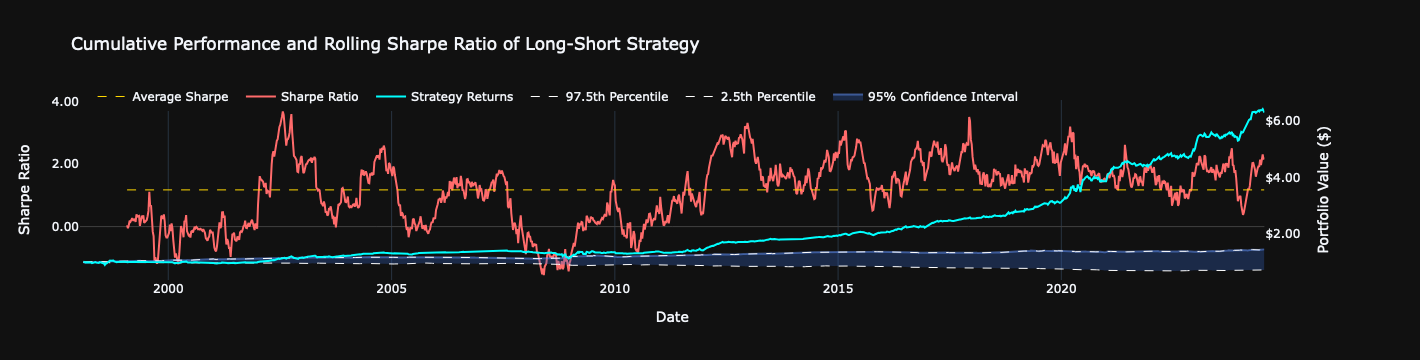

In [171]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

def calculate_rolling_sharpe_ratio(returns, window=52, risk_free_rate=0):
    excess_returns = returns - risk_free_rate
    rolling_mean = excess_returns.rolling(window=window).mean()
    rolling_std = excess_returns.rolling(window=window).std()
    rolling_std = rolling_std.replace(0, np.nan)
    sharpe = (rolling_mean / rolling_std) * np.sqrt(52)
    return sharpe.replace([np.inf, -np.inf], np.nan).dropna()

def plot_cumulative_performance_with_sharpe_and_random(cumulative_returns, portfolio_returns, lower_5_strategy, upper_95_strategy):
    # Calculate rolling Sharpe ratio
    rolling_sharpe = calculate_rolling_sharpe_ratio(portfolio_returns)
    average_sharpe = rolling_sharpe.mean()

    # Create the plot
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Plot the range between lower_5_strategy and upper_95_strategy
    fig.add_trace(
        go.Scatter(
            x=lower_5_strategy.index,
            y=lower_5_strategy.values,
            fill=None,
            mode='lines',
            line_color='rgba(255, 255, 255, 0)',
            showlegend=False,
            hoverinfo='skip'
        ),
        secondary_y=True
    )
    fig.add_trace(
        go.Scatter(
            x=upper_95_strategy.index,
            y=upper_95_strategy.values,
            fill='tonexty',
            mode='lines',
            line_color='rgba(100, 150, 255, 0.5)',
            fillcolor='rgba(50, 100, 200, 0.3)',
            name='95% Confidence Interval',
            hoverinfo='skip'
        ),
        secondary_y=True
    )

    # Plot lower_5_strategy and upper_95_strategy
    fig.add_trace(
        go.Scatter(
            x=lower_5_strategy.index,
            y=lower_5_strategy.values,
            mode='lines',
            name='2.5th Percentile',
            line=dict(color='#FFFFFF', width=1, dash='dash'),
            hovertemplate='Date: %{x}<br>2.5th Percentile: $%{y:.2f}<extra></extra>'
        ),
        secondary_y=True
    )
    fig.add_trace(
        go.Scatter(
            x=upper_95_strategy.index,
            y=upper_95_strategy.values,
            mode='lines',
            name='97.5th Percentile',
            line=dict(color='#FFFFFF', width=1, dash='dash'),
            hovertemplate='Date: %{x}<br>97.5th Percentile: $%{y:.2f}<extra></extra>'
        ),
        secondary_y=True
    )

    # Plot main strategy
    fig.add_trace(
        go.Scatter(
            x=cumulative_returns.index,
            y=cumulative_returns.values,
            mode='lines',
            name='Strategy Returns',
            line=dict(color='#00FFFF', width=2),
            hovertemplate='Date: %{x}<br>Cumulative Returns: $%{y:.2f}<extra></extra>'
        ),
        secondary_y=True
    )

    fig.add_trace(
        go.Scatter(
            x=rolling_sharpe.index,
            y=rolling_sharpe.values,
            mode='lines',
            name='Sharpe Ratio',
            line=dict(color='#FF6B6B'),
            hovertemplate='Date: %{x}<br>Rolling Sharpe Ratio: %{y:.2f}<extra></extra>'
        ),
        secondary_y=False
    )

    fig.add_trace(
        go.Scatter(
            x=rolling_sharpe.index,
            y=[average_sharpe] * len(rolling_sharpe),
            mode='lines',
            name='Average Sharpe',
            line=dict(color='#FFD700', dash='dash', width=1),
            hovertemplate='Date: %{x}<br>Average Sharpe Ratio: %{y:.2f}<extra></extra>'
        ),
        secondary_y=False
    )

    max_value = max(
        cumulative_returns.max(),
        upper_95_strategy.max(),
        lower_5_strategy.max()
    )

    # Add some padding (e.g., 50%) to ensure nothing gets cut off
    y_max = max_value * 1.5

    fig.update_layout(
        title='Cumulative Performance and Rolling Sharpe Ratio of Long-Short Strategy',
        xaxis_title='Date',
        yaxis_title='Sharpe Ratio',
        yaxis2_title='Portfolio Value ($)',
        template='plotly_dark',
        legend=dict(x=0.01, y=1.1, orientation='h'),
        hovermode="x unified",
        yaxis=dict(
            showgrid=False,
            zeroline=True,
            zerolinecolor='#404040',
            zerolinewidth=1
        ),
        yaxis2=dict(
            showgrid=False,
            zeroline=True,
            zerolinecolor='#404040',
            zerolinewidth=1
        )
    )

    fig.update_yaxes(tickformat=".2f", secondary_y=False, range=[rolling_sharpe.min()*1.1, rolling_sharpe.max()*1.1])
    fig.update_yaxes(tickformat="$,.2f", secondary_y=True)

    return fig
    
def performance_plot(cumulative_returns, portfolio_returns, simulations):
    # Now call the function with your data
    return plot_cumulative_performance_with_sharpe_and_random(cumulative_returns, portfolio_returns, simulations["lower_1_strategy"], simulations["upper_99_strategy"])

performance_plot(cumulative_returns, portfolio_returns, simulations)

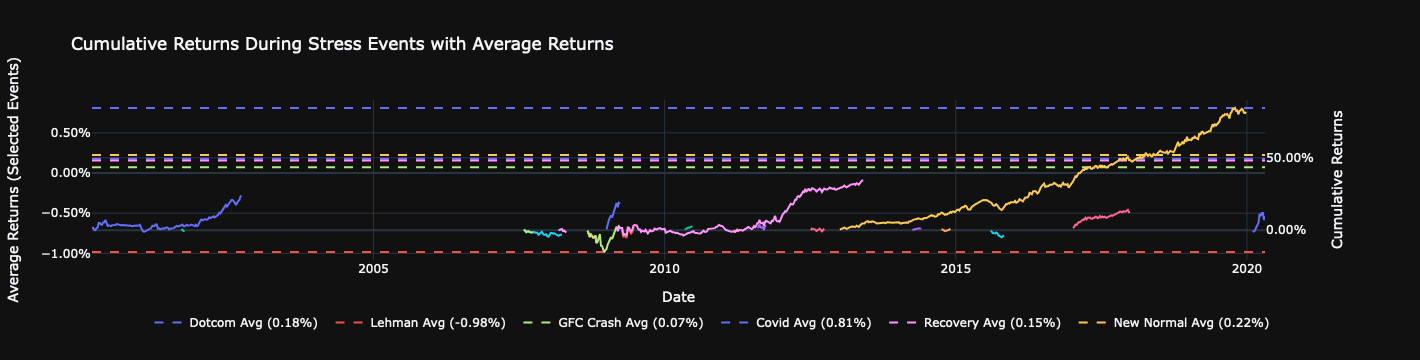

In [212]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# Assuming portfolio_returns is your weekly returns series

def get_event_returns(returns, start_date, end_date):
    event_returns = returns.loc[start_date:end_date]
    cumulative_returns = (1 + event_returns).cumprod() - 1
    return cumulative_returns

def stress_plotting(portfolio_returns):
    # Define stress event dates
    stress_events = {
        'Dotcom': ('2000-03-01', '2002-10-01'),
        'Lehman': ('2008-09-01', '2008-10-31'),
        '9/11': ('2001-09-11', '2001-10-11'),
        'US downgrade/European Debt Crisis': ('2011-08-01', '2011-09-30'),
        'Fukushima': ('2011-03-11', '2011-04-11'),
        'US Housing': ('2007-08-01', '2008-03-31'),
        'EZB IR Event': ('2012-07-01', '2012-09-30'),
        'Aug07': ('2007-08-01', '2007-09-30'),
        'Mar08': ('2008-03-01', '2008-04-30'),
        'Sept08': ('2008-09-01', '2008-10-31'),
        '2009Q1': ('2009-01-01', '2009-03-31'),
        '2009Q2': ('2009-04-01', '2009-06-30'),
        'Flash Crash': ('2010-05-01', '2010-06-30'),
        'Apr14': ('2014-04-01', '2014-05-31'),
        'Oct14': ('2014-10-01', '2014-11-30'),
        'Fall2015': ('2015-08-01', '2015-10-31'),
        'Low Volatility Bull Market': ('2017-01-01', '2017-12-31'),
        'GFC Crash': ('2008-09-01', '2009-03-31'),
        'Recovery': ('2009-03-01', '2013-05-31'),
        'New Normal': ('2013-01-01', '2019-12-31'),
        'Covid': ('2020-02-01', '2020-04-30')
    }
    
    import pandas as pd
    import numpy as np
    import plotly.graph_objs as go
    from plotly.subplots import make_subplots
    import plotly.express as px
    
    # (Keep the existing code for get_event_returns and stress_events definition)
    
    # Calculate cumulative returns for each stress event
    event_returns = {}
    event_avg_returns = {}
    for event, (start, end) in stress_events.items():
        returns = get_event_returns(portfolio_returns, start, end)
        event_returns[event] = returns
        event_avg_returns[event] = returns.iloc[-1] / len(returns)
    
    # Create a color map for events
    color_map = px.colors.qualitative.Plotly
    
    # Create the main figure with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Add traces for cumulative returns
    for i, (event, returns) in enumerate(event_returns.items()):
        color = color_map[i % len(color_map)]
        fig.add_trace(
            go.Scatter(x=returns.index, y=returns.values, mode='lines', name=event,
                       line=dict(color=color),
                       hovertemplate=f"{event}<br>Date: %{{x}}<br>Cumulative Return: %{{y:.2%}}<extra></extra>",
                       showlegend=False),  # Hide from legend
            secondary_y=True  # Changed to secondary y-axis
        )
    
    # Select events for average return lines (you can modify this list)
    selected_events = ['Dotcom', 'Lehman', 'GFC Crash', 'Covid', 'Recovery', 'New Normal']
    
    # Find the overall date range
    all_dates = [date for returns in event_returns.values() for date in returns.index]
    start_date, end_date = min(all_dates), max(all_dates)
    
    # Add horizontal lines for average returns of selected events
    for i, event in enumerate(selected_events):
        avg_return = event_avg_returns[event]
        color = color_map[list(event_returns.keys()).index(event) % len(color_map)]
        fig.add_trace(
            go.Scatter(x=[start_date, end_date],
                       y=[avg_return, avg_return],
                       mode='lines',
                       name=f'{event} Avg ({avg_return:.2%})',  # Added actual average return
                       line=dict(dash='dash', color=color),
                       hovertemplate=f"{event} Avg Return: {avg_return:.2%}<extra></extra>"),
            secondary_y=False  # Changed to primary y-axis
        )
    
    # Update layout
    fig.update_layout(
        title_text="Cumulative Returns During Stress Events with Average Returns",
        xaxis_title="Date",
        yaxis_title="Average Returns (Selected Events)",  # Swapped
        yaxis2_title="Cumulative Returns",  # Swapped
        template="plotly_white",
        showlegend=True,
        hovermode="closest",
        legend=dict(
            orientation="h",
            yanchor="top",
            y=-0.3,
            xanchor="center",
            x=0.5
        ),
        margin=dict(b=100),
        # height=700
    )
    
    # Update axes (swapped)
    fig.update_yaxes(tickformat=".2%", secondary_y=True)
    fig.update_yaxes(tickformat=".2%", secondary_y=False)
    
    # Show plot
    # fig.show()

    fig.update_layout(template="plotly_dark")
    
    return fig


stress_plotting(portfolio_returns)

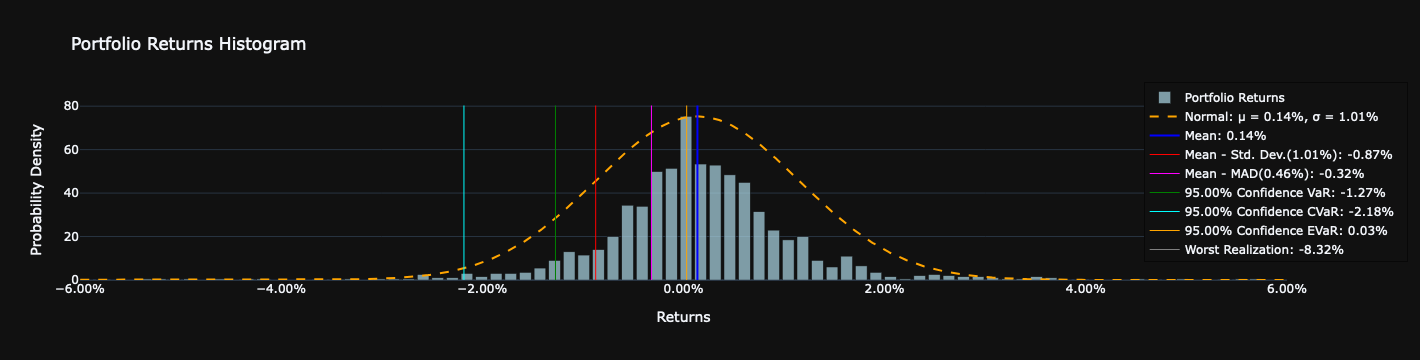

In [179]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm, median_abs_deviation

# Assuming you have already loaded your asset_returns DataFrame


def distribution_plot(asset_returns, portfolio_returns):
    # Calculate portfolio returns (mean across all assets for each date)
    portfolio_returns = asset_returns.mean(axis=1)
    
    # Remove any NaN values
    portfolio_returns = portfolio_returns.dropna()
    
    # Calculate statistics for the plot
    mean_return = portfolio_returns.mean()
    std_dev = portfolio_returns.std()
    mad = median_abs_deviation(portfolio_returns)
    var_95 = np.percentile(portfolio_returns, 5)
    cvar_95 = portfolio_returns[portfolio_returns <= var_95].mean()
    evar_95 = -np.log(np.mean(np.exp(-portfolio_returns / 0.05))) * 0.05
    worst_realization = portfolio_returns.min()
    
    # Create the histogram
    fig = go.Figure()
    
    # Calculate histogram data manually
    hist, bin_edges = np.histogram(portfolio_returns, bins=100, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Add histogram trace
    fig.add_trace(go.Bar(
        x=bin_centers,
        y=hist,
        name='Portfolio Returns',
        marker=dict(color='rgba(173, 216, 230, 0.7)'),
        hoverinfo='x+y',
        hovertemplate='Return: %{x:.2%}<br>Probability: %{y:.2%}<extra></extra>'
    ))
    
    # Add normal distribution trace
    x = np.linspace(portfolio_returns.min(), portfolio_returns.max(), 1000)
    normal_dist = norm.pdf(x, mean_return, std_dev)
    normal_dist_scaled = normal_dist * (hist.max() / normal_dist.max())  # Correct scaling
    fig.add_trace(go.Scatter(
        x=x,
        y=normal_dist_scaled,
        mode='lines',
        name=f'Normal: μ = {mean_return:.2%}, σ = {std_dev:.2%}',
        line=dict(color='orange', dash='dash')
    ))
    
    # Add vertical lines for statistics with hover information
    statistic_lines = [
        (f'Mean: {mean_return:.2%}', mean_return, 'blue', 2),
        (f'Mean - Std. Dev.({std_dev:.2%}): {mean_return - std_dev:.2%}', mean_return - std_dev, 'red', 1),
        (f'Mean - MAD({mad:.2%}): {mean_return - mad:.2%}', mean_return - mad, 'magenta', 1),
        (f'95.00% Confidence VaR: {var_95:.2%}', var_95, 'green', 1),
        (f'95.00% Confidence CVaR: {cvar_95:.2%}', cvar_95, 'cyan', 1),
        (f'95.00% Confidence EVaR: {evar_95:.2%}', evar_95, 'orange', 1),
        (f'Worst Realization: {worst_realization:.2%}', worst_realization, 'gray', 1)
    ]
    
    
    for name, value, color, width in statistic_lines:
        fig.add_trace(go.Scatter(
            x=[value, value],
            y=[0, hist.max()+5],
            mode='lines',
            name=name,
            line=dict(color=color, width=width),
            hoverinfo='name+x',
            hovertemplate=f"{name}: %{{x:.2%}}<extra></extra>"
        ))
    
    # Update layout
    fig.update_layout(
        title='Portfolio Returns Histogram',
        xaxis_title='Returns',
        yaxis_title='Probability Density',
        # height=600,
        # width=1000,
        template='plotly_dark',
        xaxis=dict(tickformat='.2%', range=[-0.06, 0.06]),
        yaxis=dict(range=[0, hist.max() * 1.1]),  # Adjust y-axis range
        legend=dict(
            x=1.1,
            y=1.1,
            xanchor='right',
            yanchor='top',
            # bgcolor='rgba(255, 255, 255, 0.7)',
            bordercolor='rgba(0, 0, 0, 0.5)',
            borderwidth=1
        ),
        hovermode='x unified'
    )

    fig.update_layout(template="plotly_dark")
    
    
    # Show the plot
    # fig.show()
    return fig

distribution_plot(asset_returns, portfolio_returns)

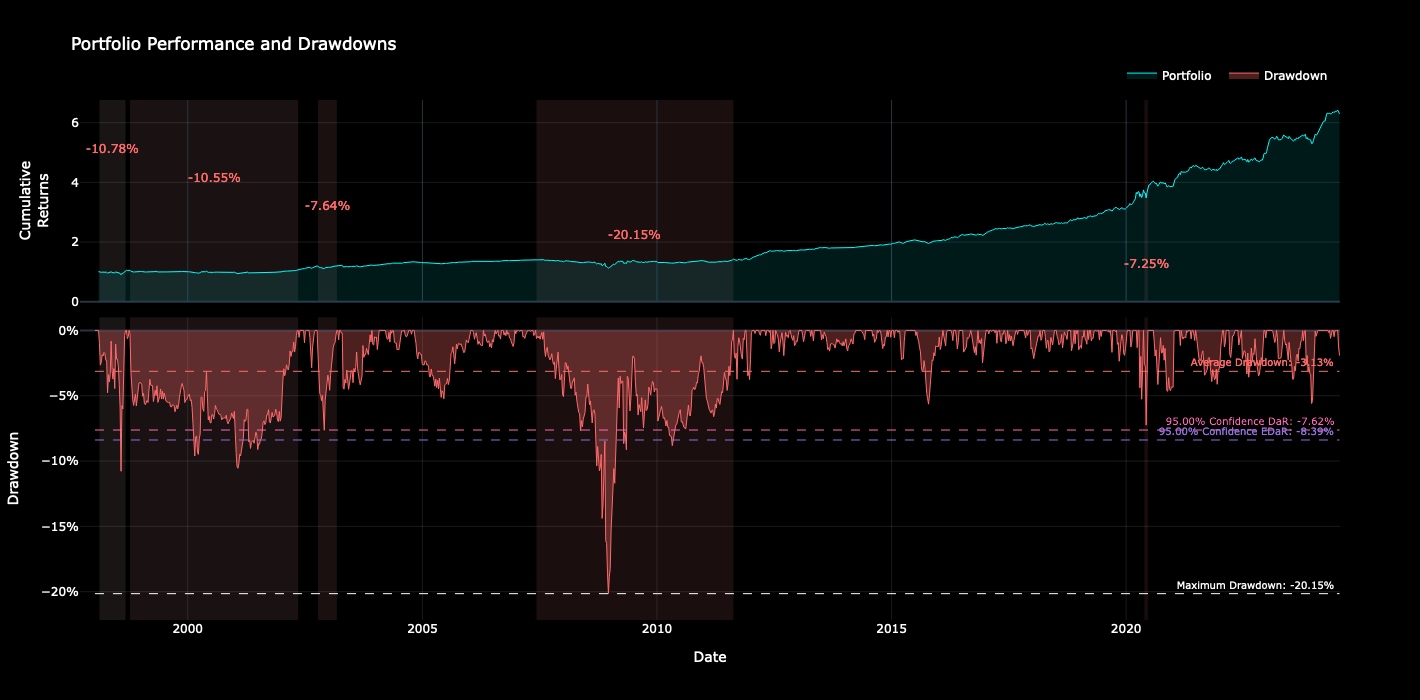

In [192]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def drawdown_plot(portfolio_returns):
    # Calculate cumulative returns
    cumulative_returns = (1 + portfolio_returns).cumprod()
    
    # Calculate drawdowns
    previous_peaks = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - previous_peaks) / previous_peaks
    drawdowns = drawdowns.bfill()

    def find_drawdown_periods(drawdowns):
        periods = []
        in_drawdown = False
        start_date = None
        for date, value in drawdowns.items():
            if not in_drawdown and value < 0:
                in_drawdown = True
                start_date = date
            elif in_drawdown and value == 0:
                in_drawdown = False
                periods.append((start_date, date, drawdowns[start_date:date].min()))
    
        if in_drawdown:
            periods.append((start_date, drawdowns.index[-1], drawdowns[start_date:].min()))
    
        return sorted(periods, key=lambda x: x[2])[:5]
    
    top_5_drawdowns = find_drawdown_periods(drawdowns)
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.03, row_heights=[0.4, 0.6])
    
    # Add cumulative returns trace
    fig.add_trace(
        go.Scatter(x=cumulative_returns.index, y=cumulative_returns, name="Portfolio",
                   line=dict(color='#00FFFF', width=1), fill='tozeroy', fillcolor='rgba(0,255,255,0.1)'),
        row=1, col=1
    )
    
    # Add drawdown trace
    fig.add_trace(
        go.Scatter(x=drawdowns.index, y=drawdowns, fill='tozeroy', name="Drawdown",
                   line=dict(color='#FF6B6B', width=1), fillcolor='rgba(255,107,107,0.3)'),
        row=2, col=1
    )
    
    # Add top 5 drawdown periods
    colors = ['rgba(255,200,200,0.2)', 'rgba(255,180,180,0.2)', 'rgba(255,160,160,0.2)',
              'rgba(255,140,140,0.2)', 'rgba(255,120,120,0.2)']
    
    top_5_drawdowns.sort(key=lambda x: x[0])
    
    for i, ((start, end, depth), color) in enumerate(zip(top_5_drawdowns, colors)):
        fig.add_vrect(
            x0=start, x1=end,
            fillcolor=color, opacity=0.5, layer="below", line_width=0,
            row='all'
        )
        y_position = cumulative_returns.max() * (0.8 - i * 0.15)
        fig.add_annotation(
            x=start + (end - start)/2, y=y_position,
            text=f"{depth:.2%}",
            showarrow=False,
            font=dict(size=12, color="#FF6B6B"),
            row=1, col=1
        )
    
    # Calculate drawdown statistics
    def calculate_ulcer_index(drawdowns):
        return np.sqrt(np.mean(drawdowns**2))
    
    def calculate_average_drawdown(drawdowns):
        return drawdowns[drawdowns < 0].mean()
    
    def calculate_dar(drawdowns, confidence=0.95):
        return np.percentile(drawdowns, (1 - confidence) * 100)
    
    def calculate_edar(drawdowns, confidence=0.95):
        return calculate_dar(drawdowns, confidence) * 1.1
    
    ulcer_index = calculate_ulcer_index(drawdowns)
    average_drawdown = calculate_average_drawdown(drawdowns)
    dar_95 = calculate_dar(drawdowns, confidence=0.95)
    edar_95 = calculate_edar(drawdowns, confidence=0.95)
    max_drawdown = drawdowns.min()
    
    # Add horizontal lines for drawdown statistics
    statistics = [
        ("Ulcer Index", ulcer_index, '#00FFFF'),
        ("Average Drawdown", average_drawdown, '#FF6B6B'),
        ("95.00% Confidence DaR", dar_95, '#FF69B4'),
        ("95.00% Confidence EDaR", edar_95, '#9370DB'),
        ("Maximum Drawdown", max_drawdown, '#FFFFFF')
    ]
    
    for name, value, color in statistics:
        fig.add_shape(
            type="line",
            x0=drawdowns.index[0],
            x1=drawdowns.index[-1],
            y0=value,
            y1=value,
            line=dict(color=color, width=1, dash="dash"),
            row=2, col=1
        )
        fig.add_annotation(
            x=drawdowns.index[-1],
            y=value,
            text=f"{name}: {value:.2%}",
            showarrow=False,
            xanchor="right",
            yanchor="bottom",
            font=dict(size=10, color=color),
            row=2, col=1
        )
    
    # Update layout
    fig.update_layout(
        title='Portfolio Performance and Drawdowns',
        height=700,
        legend_title_text='',
        showlegend=True,
        # plot_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='black',
        paper_bgcolor='black',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        font=dict(color='#FFFFFF')
    )
    
    fig.update_xaxes(title_text="Date", row=2, col=1, showgrid=True, gridcolor='rgba(255,255,255,0.1)')
    fig.update_yaxes(title_text="Cumulative<br>Returns", row=1, col=1, showgrid=True, gridcolor='rgba(255,255,255,0.1)')
    fig.update_yaxes(title_text="Drawdown", tickformat='.0%', row=2, col=1, showgrid=True, gridcolor='rgba(255,255,255,0.1)')
    
    fig.update_yaxes(range=[min(drawdowns.min(), max_drawdown)*1.1, 0.01], row=2, col=1)

    fig.update_layout(template="plotly_dark")
    
    return fig

drawdown_plot(portfolio_returns)



In [193]:
import pandas as pd
import numpy as np

def calculate_metrics(returns):
    annual_return = (1 + returns).prod() ** (52 / len(returns)) - 1
    metrics = {
        'Annual return': annual_return,
        'Cumulative returns': (1 + returns).prod() - 1,
        'Annual volatility': returns.std() * np.sqrt(52),
        'Sharpe ratio': annual_return / (returns.std() * np.sqrt(52)),
        'Max drawdown': (returns.cummax() - returns).max(),
        'Calmar ratio': annual_return / abs((returns.cummax() - returns).max()),
        'Stability': 1 - (returns.std() / returns.mean()),
        'Omega ratio': len(returns[returns > 0]) / len(returns[returns <= 0]),
        'Sortino ratio': annual_return / (returns[returns < 0].std() * np.sqrt(52)),
        'Skew': returns.skew(),
        'Kurtosis': returns.kurtosis(),
        'Tail ratio': abs(returns.quantile(0.95)) / abs(returns.quantile(0.05)),
        'Weekly value at risk': returns.quantile(0.05),
        'Gross leverage': 1.0,  # Assuming no leverage
        'Weekly turnover': returns.abs().mean()
    }
    return pd.Series(metrics)

def find_drawdown_periods(returns):
    cum_returns = (1 + returns).cumprod()
    drawdowns = cum_returns / cum_returns.cummax() - 1
    drawdown_periods = []
    in_drawdown = False
    peak_date = valley_date = recovery_date = None

    for date, value in drawdowns.items():
        if not in_drawdown and value < 0:
            in_drawdown, peak_date = True, date
        elif in_drawdown and (valley_date is None or value < drawdowns[valley_date]):
            valley_date = date
        elif in_drawdown and value == 0:
            recovery_date = date
            drawdown_periods.append((peak_date, valley_date, recovery_date, drawdowns[peak_date:valley_date].min()))
            in_drawdown, peak_date, valley_date, recovery_date = False, None, None, None

    if in_drawdown:
        drawdown_periods.append((peak_date, valley_date, 'Not Recovered', drawdowns[peak_date:valley_date].min()))

    return sorted(drawdown_periods, key=lambda x: x[3])[:5]  # Sort by drawdown depth and get top 5

def create_basic_info_table(start_date, end_date, out_of_sample_start):
    return pd.DataFrame({
        'Start date': [start_date],
        'End date': [end_date],
        'In-sample weeks': [(pd.to_datetime(out_of_sample_start) - pd.to_datetime(start_date)).days // 7],
        'Out-of-sample weeks': [(pd.to_datetime(end_date) - pd.to_datetime(out_of_sample_start)).days // 7]
    })

def create_drawdown_table(worst_drawdowns):
    return pd.DataFrame(
        [(i, f"{abs(depth):.2%}",
          peak_date.strftime('%Y-%m-%d') if peak_date else 'N/A',
          valley_date.strftime('%Y-%m-%d') if valley_date else 'N/A',
          recovery_date if recovery_date == 'Not Recovered' else (recovery_date.strftime('%Y-%m-%d') if recovery_date else 'N/A'),
          (pd.to_datetime(recovery_date) - pd.to_datetime(peak_date)).days // 7 if recovery_date and recovery_date != 'Not Recovered' else 'NaN')
         for i, (peak_date, valley_date, recovery_date, depth) in enumerate(worst_drawdowns)],
        columns=['Index', 'Net drawdown in %', 'Peak date', 'Valley date', 'Recovery date', 'Duration (weeks)']
    )

import pandas as pd
import numpy as np
from great_tables import GT, md, html
from IPython.display import display, HTML

# Keep the existing helper functions (calculate_metrics, find_drawdown_periods, etc.) as they are

def draw_down_statistics(portfolio_returns):
    # Existing preprocessing code remains the same
    portfolio_returns.index = pd.to_datetime(portfolio_returns.index)
    portfolio_returns = portfolio_returns.sort_index()

    start_date = portfolio_returns.index[0]
    while start_date.weekday() != 4:
        start_date += pd.Timedelta(days=1)

    end_date = portfolio_returns.index[-1]
    while end_date.weekday() != 4:
        end_date -= pd.Timedelta(days=1)

    out_of_sample_start = '2022-01-07'  # First Friday of 2022

    in_sample_returns = portfolio_returns[start_date:out_of_sample_start]
    out_of_sample_returns = portfolio_returns[out_of_sample_start:end_date]
    all_returns = portfolio_returns[start_date:end_date]

    metrics_df = pd.DataFrame({
        'In-sample': calculate_metrics(in_sample_returns),
        'Out-of-sample': calculate_metrics(out_of_sample_returns),
        'All': calculate_metrics(all_returns)
    })

    metrics_df = metrics_df.apply(lambda x: x.map('{:.3f}'.format))
    metrics_df.loc['Gross leverage'] = '1.000'

    # Updated Custom CSS for dark mode with improved padding
    dark_mode_css = """
    <style>
    .gt_table {
        color: #ffffff;
        background-color: #1e1e1e;
        margin-left: 10px !important;
        margin-right: auto !important;
        width: auto !important;
        padding-left: 10px !important;
    }
    .gt_heading {
        background-color: #2a2a2a;
        border-bottom-color: #444;
    }
    .gt_title {
        color: #ffffff;
        text-align: left !important;
        padding-left: 10px !important;
    }
    .gt_subtitle {
        color: #e0e0e0;
        text-align: left !important;
        padding-left: 10px !important;
    }
    .gt_column_spanner {
        border-bottom-color: #444;
        color: #ffffff;
    }
    .gt_row {
        background-color: #1e1e1e;
        color: #ffffff;
        transition: background-color 0.3s;
    }
    .gt_row:hover {
        background-color: #3a3a3a !important;
    }
    .gt_row:nth-child(even) {
        background-color: #252525;
    }
    .gt_stub {
        color: #ffffff;
        background-color: #2a2a2a;
        text-align: left !important;
    }
    .gt_summary_row {
        background-color: #2a2a2a;
        color: #ffffff;
    }
    .gt_grand_summary_row {
        background-color: #333333;
        color: #ffffff;
    }
    .gt_footnote {
        color: #e0e0e0;
        text-align: left !important;
    }
    .gt_source_notes {
        background-color: #2a2a2a;
        color: #e0e0e0;
        text-align: left !important;
    }
    .gt_col_heading {
        color: #ffffff;
        text-align: left !important;
    }
    .gt_center {
        text-align: left !important;
    }
    .gt_row td, .gt_stub, .gt_col_heading {
        padding-left: 10px !important;
    }
    </style>
    """
    # Create Table 1: Basic Information
    table1_info = create_basic_info_table(start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'), out_of_sample_start)
    table1_gt = (
        GT(table1_info)
        .tab_header(title="Basic Information")
        .opt_stylize(style=2, color="blue")
    )

    # Create Table 2: Performance Overview
    table2_gt = (
        GT(metrics_df.reset_index())
        .tab_header(title="Performance Overview")
        .cols_label(
            index="Metric",
            **{col: col for col in metrics_df.columns}
        )
        .opt_stylize(style=2, color="blue")
    )

    # Create Table 3: Worst Drawdown Periods
    worst_drawdowns = find_drawdown_periods(all_returns)
    table3 = create_drawdown_table(worst_drawdowns)
    table3_gt = (
        GT(table3)
        .tab_header(title="Worst Drawdown Periods")
        .opt_stylize(style=2, color="blue")
    )

    # Combine dark mode CSS with table HTML
    table1_html = dark_mode_css + table1_gt.render(context="html")
    table2_html = dark_mode_css + table2_gt.render(context="html")
    table3_html = dark_mode_css + table3_gt.render(context="html")

    # Display tables
    display(HTML(table1_html))
    display(HTML(table3_html))
    display(HTML(table2_html))

# Assuming portfolio_returns is your weekly returns DataFrame
draw_down_statistics(portfolio_returns)

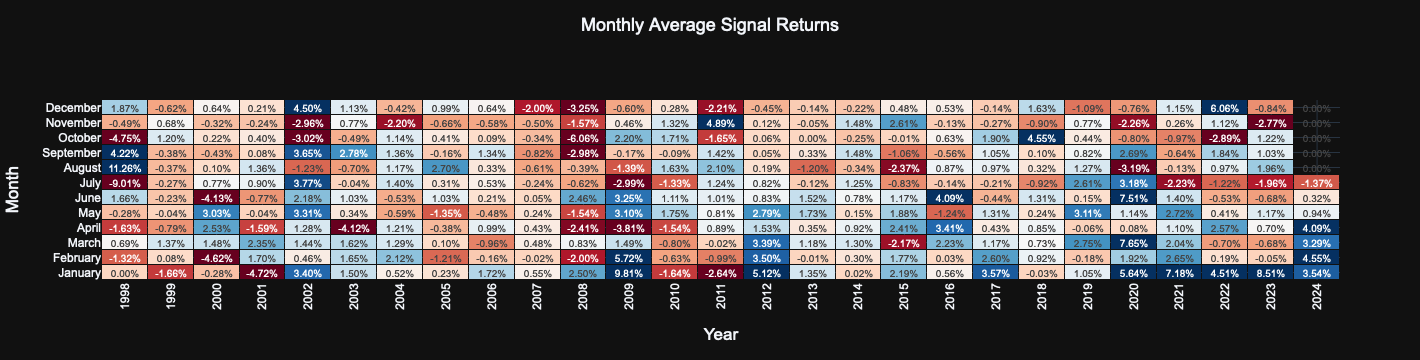

In [195]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

def create_weekly_returns_heatmap(portfolio_returns):
    # Ensure the index is datetime
    portfolio_returns.index = pd.to_datetime(portfolio_returns.index)

    # Get all unique years from the index
    all_years = sorted(portfolio_returns.index.year.unique())

    # Calculate monthly average of weekly returns
    monthly_avg = portfolio_returns.groupby([portfolio_returns.index.year, portfolio_returns.index.month]).sum()

    # Reshape the data into a 2D array, including all years
    heatmap_data = monthly_avg.unstack(level=0).reindex(columns=all_years, fill_value=np.nan)

    # Create a list of month names for y-axis labels
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Get full year labels
    year_labels = [str(year) for year in all_years]

    # Create the heatmap
    fig = go.Figure(data=go.Heatmap(
        z=heatmap_data.values,
        x=year_labels,
        y=month_names,
        colorscale='rdbu',  # Red for negative, Blue for positive
        zmin=np.nanpercentile(heatmap_data.values, 5),  # 5th percentile for lower bound
        zmax=np.nanpercentile(heatmap_data.values, 95),  # 95th percentile for upper bound
        showscale=False,  # Remove the color scale
        hovertemplate='Year: %{x}<br>Month: %{y}<br>Return: %{z:.2%}<extra></extra>',
        text=heatmap_data.values,
        texttemplate='%{text:.2%}',
        textfont={"size": 10},
    ))

    # Update layout
    fig.update_layout(
        title={
            'text': 'Monthly Average Signal Returns',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=18)
        },
        xaxis_title='Year',
        yaxis_title='Month',
        xaxis_tickangle=-90,
        xaxis=dict(
            tickmode='array',
            tickvals=list(range(len(year_labels))),
            ticktext=year_labels,
            tickfont=dict(size=12)
        ),
        yaxis=dict(
            tickfont=dict(size=12)
        ),
        font=dict(family="Arial", size=14),
        plot_bgcolor='rgba(0,0,0,0)',
    )

    # Add a border to the heatmap cells
    fig.update_traces(xgap=1, ygap=1)

    fig.update_layout(template="plotly_dark")

    return fig

create_weekly_returns_heatmap(portfolio_returns)


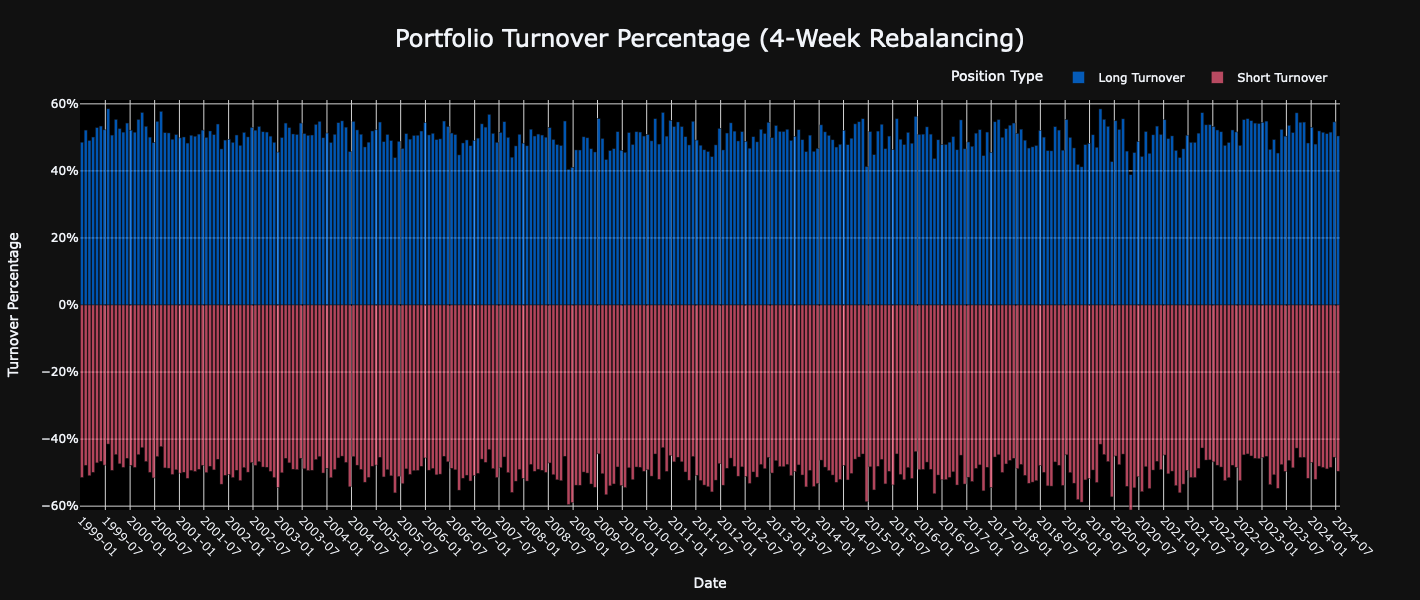

In [209]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

def calculate_turnover(df, mask):
    df_rebalance = df[mask]
    # Separate long and short positions
    long_positions = df_rebalance.where(df_rebalance > 0, 0)
    short_positions = df_rebalance.where(df_rebalance < 0, 0).abs()
    # Calculate changes for each strategy
    long_changes = long_positions.diff().abs().sum(axis=1)
    short_changes = short_positions.diff().abs().sum(axis=1)
    # Calculate total turnover
    total_turnover = long_changes + short_changes
    # Calculate percentages
    long_percentage = (long_changes / total_turnover * 100).fillna(0)
    short_percentage = (short_changes / total_turnover * 100).fillna(0)
    return pd.DataFrame({
        'Long Turnover %': long_percentage,
        'Short Turnover %': -short_percentage  # Negative to show below x-axis
    })


def turnover_plot(df_balance, rebalance_mask):
    # Calculate turnover percentages
    turnover_df = calculate_turnover(df_balance, rebalance_mask) 
    turnover_df = turnover_df.query("index >= '1999-01-01'")
    
    # Find the max and min values
    y_max = max(turnover_df['Long Turnover %'].max(), abs(turnover_df['Short Turnover %'].min()))
    y_min = -y_max  # Make it symmetrical
    
    # Create the stacked bar chart
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=turnover_df.index,
        y=turnover_df['Long Turnover %'],
        name='Long Turnover',
        marker_color='rgba(0, 123, 255, 0.7)'
    ))
    fig.add_trace(go.Bar(
        x=turnover_df.index,
        y=turnover_df['Short Turnover %'],
        name='Short Turnover',
        marker_color='rgba(255, 99, 132, 0.7)'
    ))
    
    # Update layout
    fig.update_layout(
        title={
            'text': 'Portfolio Turnover Percentage (4-Week Rebalancing)',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=24)
        },
        xaxis_title='Date',
        yaxis_title='Turnover Percentage',
        barmode='relative',
        legend_title='Position Type',
        hovermode='x unified',
        plot_bgcolor='black',
        # width=1200,
        height=600,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    # Adjust x-axis
    fig.update_xaxes(
        tickformat='%Y-%m',
        dtick='M6',
        tickangle=45,
        showgrid=True,
        gridcolor='lightgrey'
    )
    
    # Adjust y-axis
    fig.update_yaxes(
        range=[y_min, y_max],  # Set the range based on data
        ticksuffix='%',
        showgrid=True,
        gridcolor='lightgrey',
        zeroline=True,
        zerolinecolor='black',
        zerolinewidth=2
    )
    
    # Show the plot

    fig.update_layout(template="plotly_dark")
    
    return fig

turnover_plot(df_balance, rebalance_mask)

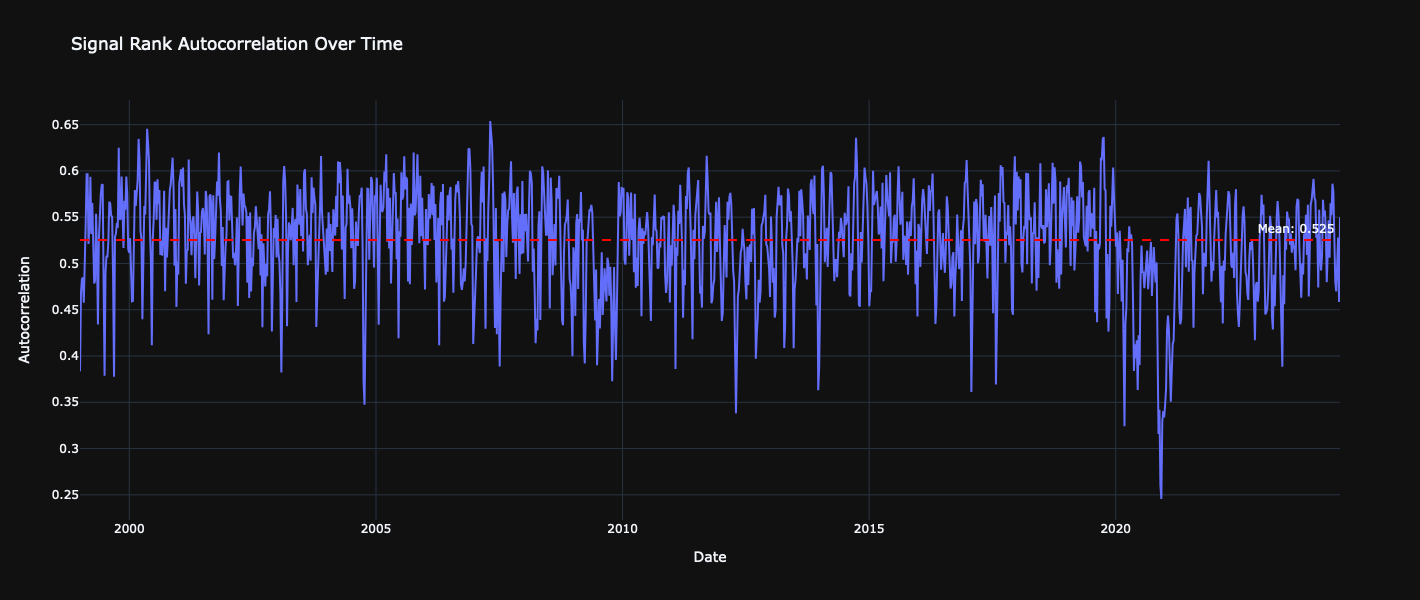

In [207]:
import pandas as pd
import numpy as np

def fast_rolling_autocorrelation(df, window):
    # Convert DataFrame to NumPy array
    data = df.values

    # Create 3D array: (window, num_rows - window + 1, num_columns)
    shape = (window, data.shape[0] - window + 1, data.shape[1])
    strides = (data.strides[0], data.strides[0], data.strides[1])
    windows = np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)

    # Calculate means for each window
    means = np.mean(windows, axis=0)

    # Calculate variances for each window
    variances = np.var(windows, axis=0)

    # Calculate covariance
    covariance = np.mean((windows[:-1] - means) * (windows[1:] - means), axis=0)

    # Calculate autocorrelation
    autocorrelation = covariance / variances

    # Create DataFrame with results
    result = pd.DataFrame(autocorrelation, index=df.index[window-1:], columns=df.columns)

    return result


def signal_correlation(df_signal):
    window_size = 12
    autocorrelation = fast_rolling_autocorrelation(df_signal, window_size)
    autocorrelation_single = autocorrelation.query("date >='1999-01-01'").mean(axis=1)
    
    mean_autocorrelation = np.mean(autocorrelation_single)
    
    fig = make_subplots(rows=1, cols=1)
    
    fig.add_trace(
        go.Scatter(
            x=autocorrelation_single.index,
            y=autocorrelation_single.values,
            mode='lines',
            name='Autocorrelation'
        )
    )
    
    fig.add_hline(y=mean_autocorrelation, line_dash="dash", line_color="red",
                  annotation_text=f"Mean: {mean_autocorrelation:.3f}", 
                  annotation_position="top right")
    
    fig.update_layout(
        title='Signal Rank Autocorrelation Over Time',
        xaxis_title='Date',
        yaxis_title='Autocorrelation',
        hovermode='x unified',
        # template='plotly_white'  # This will adapt to dark mode automatically
    )
    
    return fig

signal_correlation(df_signal)

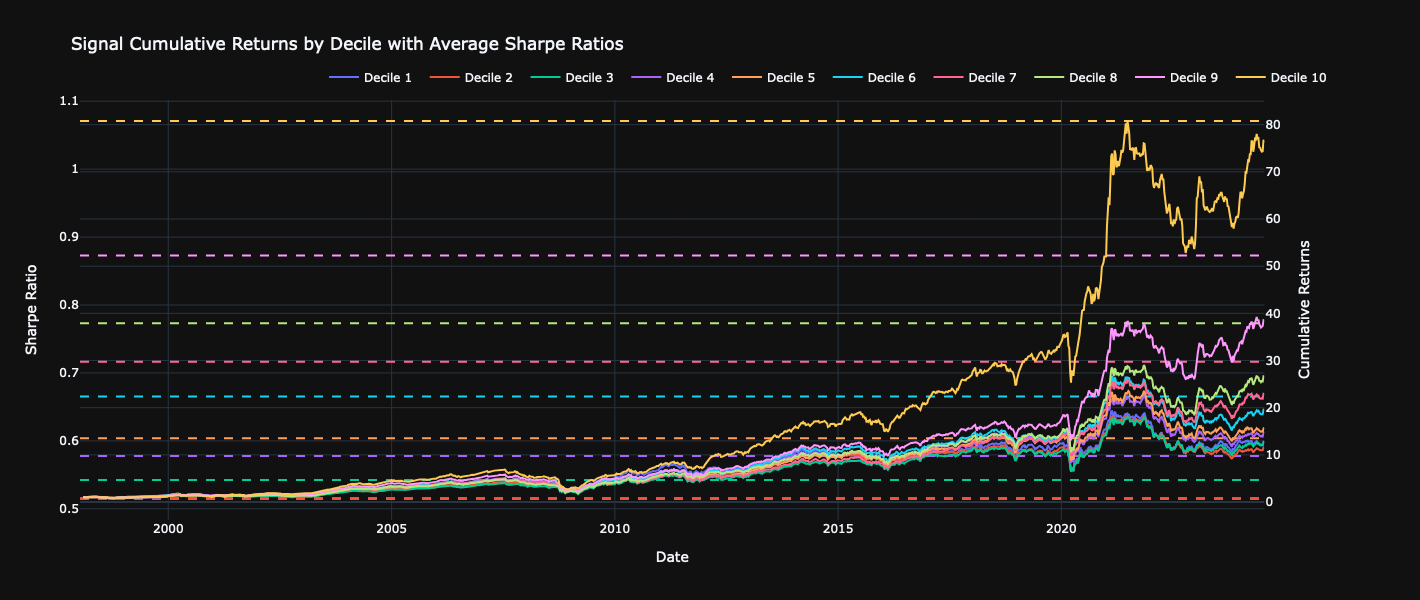

In [208]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from joblib import Parallel, delayed

def create_portfolio_holdings_fast(df_signal, lower_bound, upper_bound):
    signal_array = df_signal.values
    holdings_array = np.zeros_like(signal_array)
    holdings_array[(signal_array > lower_bound) & (signal_array <= upper_bound)] = 1
    holdings_array[np.isnan(signal_array)] = np.nan
    df_holdings = pd.DataFrame(holdings_array, index=df_signal.index, columns=df_signal.columns)
    return df_holdings

def calculate_returns_and_sharpe(df_holdings, df_prices, risk_free_rate=0):
    df_temp = df_holdings.fillna(2)
    rebalance_mask = pd.Series(False, index=df_temp.index)
    rebalance_mask.iloc[0] = True
    rebalance_mask.iloc[4::4] = True
    df_rebalanced = df_temp.where(rebalance_mask, np.nan).ffill().replace({2: np.nan, 0: np.nan})

    price_changes = df_prices.pct_change(fill_method=None).clip(upper=1)
    asset_returns = df_rebalanced * price_changes
    portfolio_returns = asset_returns.mean(axis=1)
    cumulative_returns = (1 + portfolio_returns).cumprod()

    excess_returns = portfolio_returns - risk_free_rate
    sharpe_ratio = np.sqrt(52) * excess_returns.mean() / excess_returns.std()

    return cumulative_returns, sharpe_ratio

def process_decile(i, df_signal, df_prices):
    lower_bound = i * 10
    upper_bound = (i + 1) * 10
    df_holdings = create_portfolio_holdings_fast(df_signal, lower_bound, upper_bound)
    returns, sharpe = calculate_returns_and_sharpe(df_holdings, df_prices)
    return f'Decile {i+1}', returns, sharpe


def decile_plots(df_signal, df_prices):
    # Assuming df_signal and df_prices are already defined
    
    # Use joblib to parallelize the calculations
    results = Parallel(n_jobs=-1)(delayed(process_decile)(i, df_signal, df_prices) for i in range(10))
    
    # Convert results to dictionaries
    decile_returns = {decile: returns for decile, returns, _ in results}
    decile_sharpes = {decile: sharpe for decile, _, sharpe in results}
    
    # Create the plot with secondary y-axis
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    # Plot cumulative returns
    for decile, returns in decile_returns.items():
        fig.add_trace(go.Scatter(
            x=returns.index,
            y=returns.values,
            mode='lines',
            name=decile
        ), secondary_y=True)
    
    # Add horizontal lines for average Sharpe ratios on secondary y-axis
    for decile, sharpe in decile_sharpes.items():
        fig.add_trace(go.Scatter(
            x=[returns.index[0], returns.index[-1]],
            y=[sharpe, sharpe],
            mode='lines',
            name=f'{decile} Sharpe: {sharpe:.2f}',
            line=dict(dash='dash'),
            showlegend=False
        ), secondary_y=False)
    
    # Update layout
    fig.update_layout(
        title='Signal Cumulative Returns by Decile with Average Sharpe Ratios',
        xaxis_title='Date',
        # template='plotly_white',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    # Update y-axes
    fig.update_yaxes(title_text="Cumulative Returns", secondary_y=True)
    fig.update_yaxes(title_text="Sharpe Ratio", secondary_y=False)

    fig.update_layout(template="plotly_dark", height=600,)
    
    # Show the plot
    return fig
    
    # If you want to save the plot as an HTML file
    # fig.write_html("cumulative_returns_and_sharpe_by_decile.html")

decile_plots(df_signal, df_prices)